In [50]:
import json
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text

In [51]:
jsons = sorted(glob.glob(
    os.path.join('speech_evals', '*', '*_1.json')
))
df = pd.DataFrame([
    json.load(open(j, 'r', encoding='utf-8')) for j in jsons
]).sort_values(by=['cpu_mem_usage', 'model_name'])

In [52]:
df['agg_wer'] = (df['en_results_wer'] + df['es_results_wer'] + df['wiki_results_wer']) / 3
df['agg_rtf'] = (df['en_results_rtf'] + df['es_results_rtf'] + df['wiki_results_rtf']) / 3
df['en_results_tradeoff'] = df['en_results_wer'] * df['en_results_rtf'] / df['en_results_rtf'].max()
df['es_results_tradeoff'] = df['es_results_wer'] * df['es_results_rtf'] / df['es_results_rtf'].max()
df['wiki_results_tradeoff'] = df['wiki_results_wer'] * df['wiki_results_rtf'] / df['wiki_results_rtf'].max()
df['agg_tradeoff'] = df['agg_wer'] * df['agg_rtf'] / df['agg_rtf'].max()

In [53]:
print(df[['model_name', 'en_results_wer', 'es_results_wer', 'wiki_results_wer', 'agg_wer']].round(2).astype(str).to_latex(index=False))

\begin{tabular}{lllll}
\toprule
model_name & en_results_wer & es_results_wer & wiki_results_wer & agg_wer \\
\midrule
tiny & 0.19 & 0.78 & 0.16 & 0.38 \\
base & 0.12 & 0.61 & 0.15 & 0.29 \\
faster-small-quantized & 0.08 & 0.35 & 0.07 & 0.17 \\
faster-small & 0.08 & 0.33 & 0.08 & 0.16 \\
faster-medium-quantized & 0.07 & 0.24 & 0.03 & 0.11 \\
small & 0.09 & 0.39 & 0.07 & 0.18 \\
faster-large-v3-quantized & 0.06 & 0.12 & 0.04 & 0.07 \\
distil-whisper/distil-large-v2 & 0.07 & 0.96 & 0.06 & 0.37 \\
distil-whisper/distil-large-v3.5 & 0.06 & 1.01 & 0.04 & 0.37 \\
medium & 0.07 & 0.28 & 0.03 & 0.12 \\
turbo & 0.06 & 0.15 & 0.01 & 0.07 \\
faster-medium & 0.07 & 0.22 & 0.04 & 0.11 \\
large-v1 & 0.07 & 0.21 & 0.03 & 0.1 \\
large-v2 & 0.06 & 0.17 & 0.03 & 0.09 \\
large-v3 & 0.07 & 0.12 & 0.03 & 0.07 \\
faster-large-v3 & 0.06 & 0.12 & 0.04 & 0.07 \\
\bottomrule
\end{tabular}



In [54]:
print(df[['model_name', 'en_results_rtf', 'es_results_rtf', 'wiki_results_rtf', 'agg_rtf']].round(2).astype(str).to_latex(index=False))

\begin{tabular}{lllll}
\toprule
model_name & en_results_rtf & es_results_rtf & wiki_results_rtf & agg_rtf \\
\midrule
tiny & 0.08 & 0.16 & 0.08 & 0.11 \\
base & 0.08 & 0.14 & 0.14 & 0.12 \\
faster-small-quantized & 0.38 & 0.34 & 1.01 & 0.58 \\
faster-small & 0.8 & 0.68 & 0.94 & 0.8 \\
faster-medium-quantized & 1.79 & 2.8 & 3.49 & 2.69 \\
small & 0.19 & 0.17 & 0.37 & 0.25 \\
faster-large-v3-quantized & 2.65 & 1.82 & 3.98 & 2.82 \\
distil-whisper/distil-large-v2 & 0.44 & 0.4 & 0.77 & 0.54 \\
distil-whisper/distil-large-v3.5 & 0.42 & 0.37 & 0.76 & 0.51 \\
medium & 0.55 & 0.55 & 1.1 & 0.73 \\
turbo & 1.3 & 1.08 & 2.66 & 1.68 \\
faster-medium & 1.44 & 1.42 & 2.33 & 1.73 \\
large-v1 & 0.98 & 0.89 & 1.9 & 1.26 \\
large-v2 & 0.98 & 0.9 & 1.86 & 1.25 \\
large-v3 & 0.97 & 0.94 & 1.91 & 1.27 \\
faster-large-v3 & 2.5 & 2.23 & 3.9 & 2.88 \\
\bottomrule
\end{tabular}



<Figure size 1000x400 with 0 Axes>

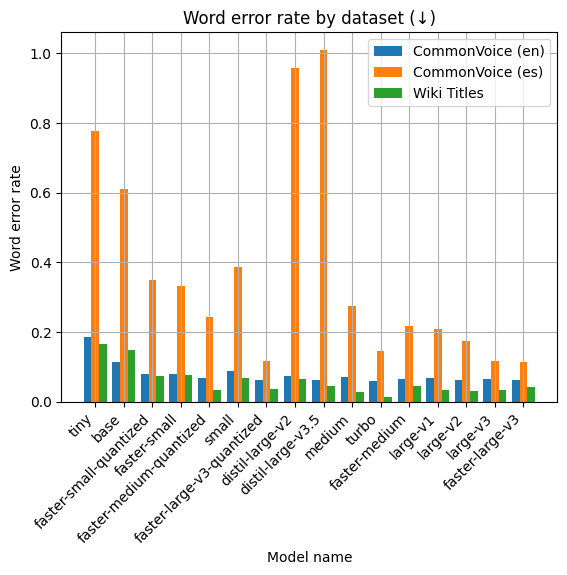

In [55]:
plt.figure(figsize=(10,4))

cats = df['model_name'].str.replace('distil-whisper/', '')
vals1, vals2, vals3 = df['en_results_wer'], df['es_results_wer'], df['wiki_results_wer']

# Bar width and x locations
w, x = 0.8, 3*np.arange(len(cats))

fig, ax = plt.subplots()
ax.bar(x - w, vals1, width=w, label='CommonVoice (en)')
ax.bar(x, vals2, width=w, label='CommonVoice (es)')
ax.bar(x + w, vals3, width=w, label='Wiki Titles')

ax.set_xticks(x)
ax.set_xticklabels(cats, rotation=45, ha='right')
ax.set_xlabel('Model name')
ax.set_ylabel('Word error rate')
ax.set_title('Word error rate by dataset (↓)')
ax.legend()

plt.grid()
plt.savefig('figs/wer_breakdown.pdf', dpi=300, bbox_inches='tight')

<Figure size 1000x400 with 0 Axes>

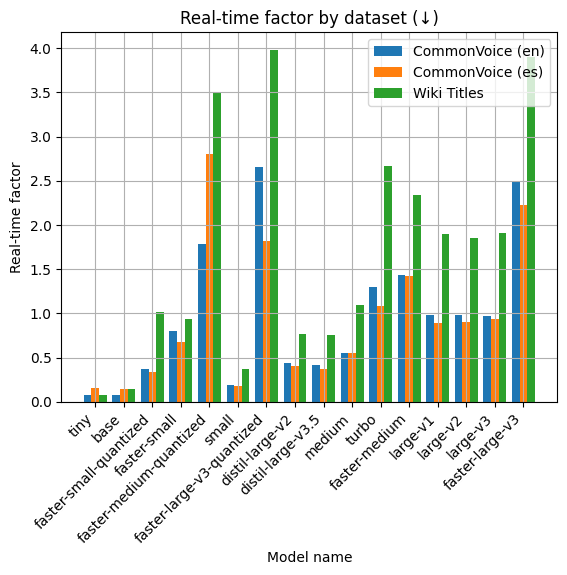

In [56]:
plt.figure(figsize=(10,4))

cats = df['model_name'].str.replace('distil-whisper/', '')
vals1, vals2, vals3 = df['en_results_rtf'], df['es_results_rtf'], df['wiki_results_rtf']

# Bar width and x locations
w, x = 0.8, 3*np.arange(len(cats))

fig, ax = plt.subplots()
ax.bar(x - w, vals1, width=w, label='CommonVoice (en)')
ax.bar(x, vals2, width=w, label='CommonVoice (es)')
ax.bar(x + w, vals3, width=w, label='Wiki Titles')

ax.set_xticks(x)
ax.set_xticklabels(cats, rotation=45, ha='right')
ax.set_xlabel('Model name')
ax.set_ylabel('Real-time factor')
ax.set_title('Real-time factor by dataset (↓)')
ax.legend()

plt.grid()
plt.savefig('figs/rtf_breakdown.pdf', dpi=300, bbox_inches='tight')

<Figure size 1000x400 with 0 Axes>

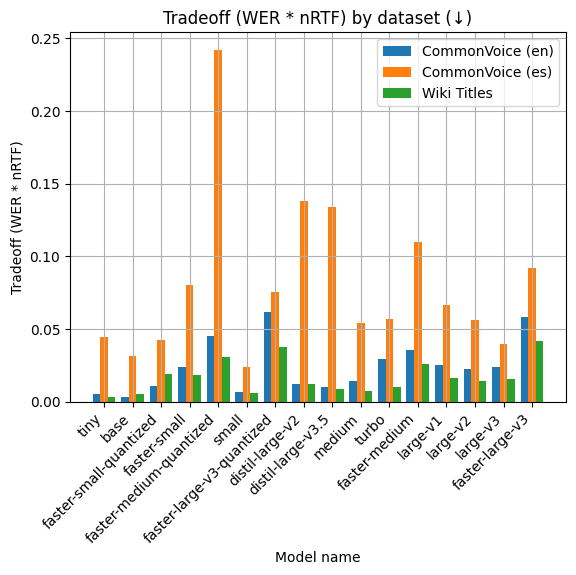

In [57]:
plt.figure(figsize=(10,4))

cats = df['model_name'].str.replace('distil-whisper/', '')
vals1, vals2, vals3 = df['en_results_tradeoff'], df['es_results_tradeoff'], df['wiki_results_tradeoff']

# Bar width and x locations
w, x = 0.8, 3*np.arange(len(cats))

fig, ax = plt.subplots()
ax.bar(x - w, vals1, width=w, label='CommonVoice (en)')
ax.bar(x, vals2, width=w, label='CommonVoice (es)')
ax.bar(x + w, vals3, width=w, label='Wiki Titles')

ax.set_xticks(x)
ax.set_xticklabels(cats, rotation=45, ha='right')
ax.set_xlabel('Model name')
ax.set_ylabel('Tradeoff (WER * nRTF)')
ax.set_title('Tradeoff (WER * nRTF) by dataset (↓)')
ax.legend()

plt.grid()
plt.savefig('figs/tradeoff_breakdown.pdf', dpi=300, bbox_inches='tight')

<Figure size 1000x400 with 0 Axes>

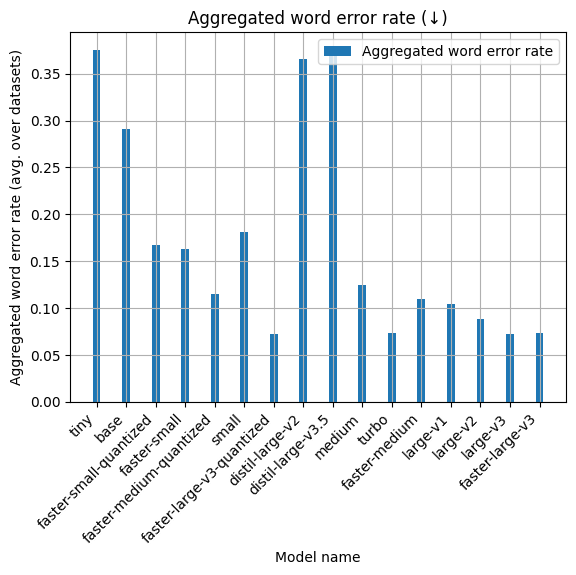

In [58]:
plt.figure(figsize=(10,4))

cats = df['model_name'].str.replace('distil-whisper/', '')
vals = df['agg_wer']

# Bar width and x locations
w, x = 0.8, 3*np.arange(len(cats))

fig, ax = plt.subplots()
ax.bar(x, vals, width=w, label='Aggregated word error rate')

ax.set_xticks(x)
ax.set_xticklabels(cats, rotation=45, ha='right')
ax.set_xlabel('Model name')
ax.set_ylabel('Aggregated word error rate (avg. over datasets)')
ax.set_title('Aggregated word error rate (↓)')
ax.legend()

plt.grid()
plt.savefig('figs/wer.pdf', dpi=300, bbox_inches='tight')

<Figure size 1000x400 with 0 Axes>

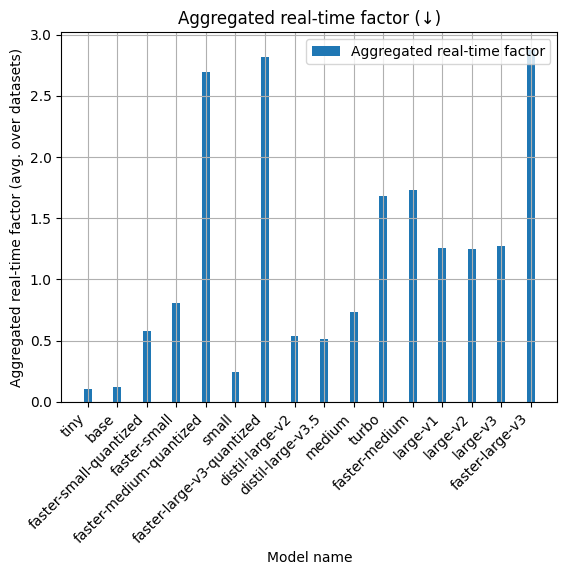

In [59]:
plt.figure(figsize=(10,4))

cats = df['model_name'].str.replace('distil-whisper/', '')
vals = df['agg_rtf']

# Bar width and x locations
w, x = 0.8, 3*np.arange(len(cats))

fig, ax = plt.subplots()
ax.bar(x, vals, width=w, label='Aggregated real-time factor')

ax.set_xticks(x)
ax.set_xticklabels(cats, rotation=45, ha='right')
ax.set_xlabel('Model name')
ax.set_ylabel('Aggregated real-time factor (avg. over datasets)')
ax.set_title('Aggregated real-time factor (↓)')
ax.legend()

plt.grid()
plt.savefig('figs/rtf.pdf', dpi=300, bbox_inches='tight')

<Figure size 1000x400 with 0 Axes>

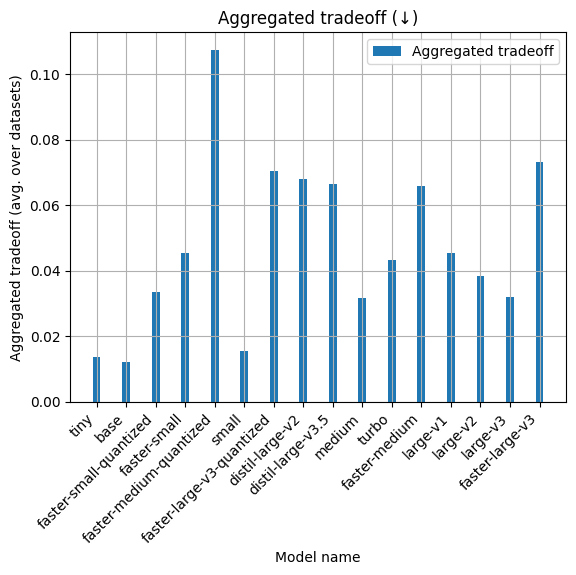

In [60]:
plt.figure(figsize=(10,4))

cats = df['model_name'].str.replace('distil-whisper/', '')
vals = df['agg_tradeoff']

# Bar width and x locations
w, x = 0.8, 3*np.arange(len(cats))

fig, ax = plt.subplots()
ax.bar(x, vals, width=w, label='Aggregated tradeoff')

ax.set_xticks(x)
ax.set_xticklabels(cats, rotation=45, ha='right')
ax.set_xlabel('Model name')
ax.set_ylabel('Aggregated tradeoff (avg. over datasets)')
ax.set_title('Aggregated tradeoff (↓)')
ax.legend()

plt.grid()
plt.savefig('figs/tradeoff.pdf', dpi=300, bbox_inches='tight')

<Figure size 1000x400 with 0 Axes>

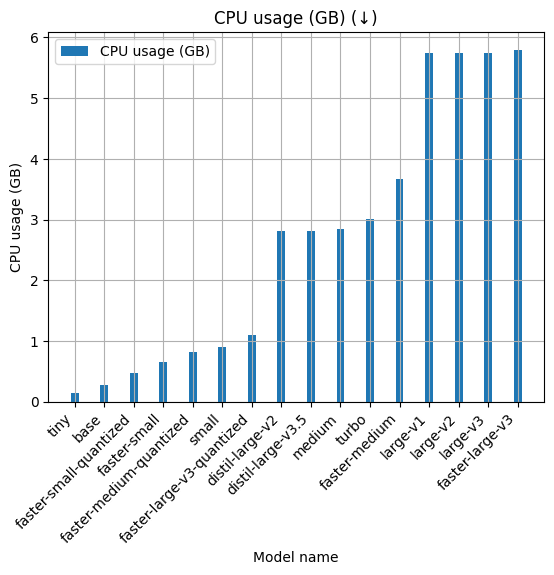

In [61]:
plt.figure(figsize=(10,4))

cats = df['model_name'].str.replace('distil-whisper/', '')
vals = df['cpu_mem_usage']

# Bar width and x locations
w, x = 0.8, 3*np.arange(len(cats))

fig, ax = plt.subplots()
ax.bar(x, vals, width=w, label='CPU usage (GB)')

ax.set_xticks(x)
ax.set_xticklabels(cats, rotation=45, ha='right')
ax.set_xlabel('Model name')
ax.set_ylabel('CPU usage (GB)')
ax.set_title('CPU usage (GB) (↓)')
ax.legend()

plt.grid()
plt.savefig('figs/usage.pdf', dpi=300, bbox_inches='tight')

In [62]:
table = df[['model_name', 'cpu_mem_usage']].sort_values(by=['cpu_mem_usage'])
table['model_name'] = table['model_name'].apply(lambda x: '\\texttt{' + x.replace('distil-whisper/', '') + '}')
table['cpu_mem_usage'] = table['cpu_mem_usage'].round(2).astype(str)
print(table.to_latex(index=False))

\begin{tabular}{ll}
\toprule
model_name & cpu_mem_usage \\
\midrule
\texttt{tiny} & 0.14 \\
\texttt{base} & 0.27 \\
\texttt{faster-small-quantized} & 0.47 \\
\texttt{faster-small} & 0.66 \\
\texttt{faster-medium-quantized} & 0.81 \\
\texttt{small} & 0.9 \\
\texttt{faster-large-v3-quantized} & 1.11 \\
\texttt{distil-large-v2} & 2.82 \\
\texttt{distil-large-v3.5} & 2.82 \\
\texttt{medium} & 2.84 \\
\texttt{turbo} & 3.01 \\
\texttt{faster-medium} & 3.66 \\
\texttt{large-v1} & 5.74 \\
\texttt{large-v2} & 5.74 \\
\texttt{large-v3} & 5.74 \\
\texttt{faster-large-v3} & 5.8 \\
\bottomrule
\end{tabular}



<Figure size 1000x400 with 0 Axes>

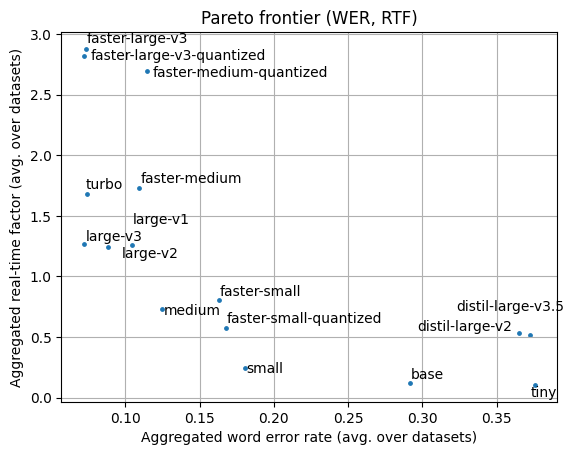

In [63]:
plt.figure(figsize=(10,4))

names = df['model_name'].str.replace('distil-whisper/', '')
x = df['agg_wer']
y = df['agg_rtf']

fig, ax = plt.subplots()
ax.scatter(x, y, s=6)

texts = [plt.text(x_i, y_i, s_i) for x_i, y_i, s_i in zip(x, y, names)]

ax.set_xlabel('Aggregated word error rate (avg. over datasets)')
ax.set_ylabel('Aggregated real-time factor (avg. over datasets)')
ax.set_title('Pareto frontier (WER, RTF)')
adjust_text(texts, x=x, y=y, autoalign='y',
            only_move={'points':'y', 'text':'y'}, force_points=0.15)

plt.grid()
plt.savefig('figs/pareto.pdf', dpi=300, bbox_inches='tight')

/var/folders/54/ctkh4lg97kd4x1fv3qzrpd3c0000gp/T/ipykernel_61014/515326478.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x, y, s=6, c=c)
/var/folders/54/ctkh4lg97kd4x1fv3qzrpd3c0000gp/T/ipykernel_61014/515326478.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x, y, s=6, c=c)
/var/folders/54/ctkh4lg97kd4x1fv3qzrpd3c0000gp/T/ipykernel_61014/515326478.py:9: UserWarning: *c* argument looks like a 

<Figure size 1000x400 with 0 Axes>

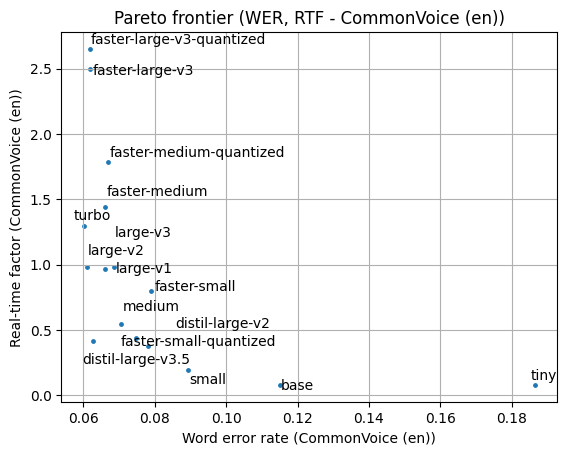

<Figure size 1000x400 with 0 Axes>

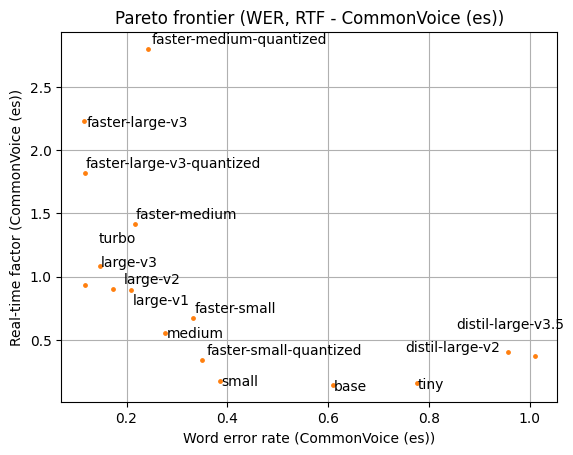

<Figure size 1000x400 with 0 Axes>

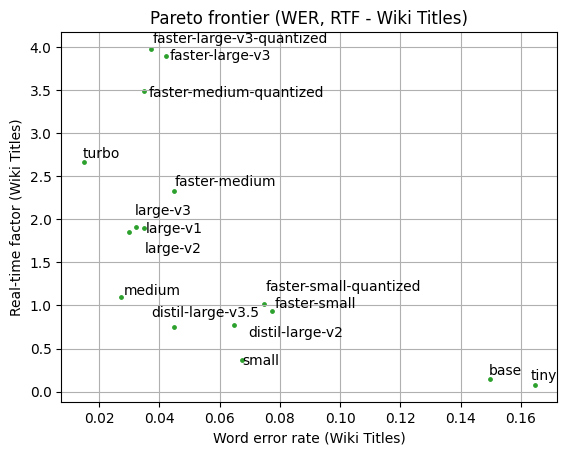

In [64]:
for ds, c, ds_name in zip(('en', 'es', 'wiki'), plt.cm.tab10([0, 1, 2]), ('CommonVoice (en)', 'CommonVoice (es)', 'Wiki Titles')):
    plt.figure(figsize=(10,4))

    names = df['model_name'].str.replace('distil-whisper/', '')
    x = df[f'{ds}_results_wer']
    y = df[f'{ds}_results_rtf']

    fig, ax = plt.subplots()
    ax.scatter(x, y, s=6, c=c)

    texts = [plt.text(x_i, y_i, s_i) for x_i, y_i, s_i in zip(x, y, names)]

    ax.set_xlabel(f'Word error rate ({ds_name})')
    ax.set_ylabel(f'Real-time factor ({ds_name})')
    ax.set_title(f'Pareto frontier (WER, RTF - {ds_name})')
    adjust_text(texts, x=x, y=y, autoalign='y',
                only_move={'points':'y', 'text':'y'}, force_points=0.15)

    plt.grid()
    plt.savefig(f'figs/{ds}_pareto.pdf', dpi=300, bbox_inches='tight')

In [65]:
df['pareto_distance'] = np.sqrt((df['agg_rtf'] / df['agg_rtf'].max())**2 + df['agg_wer']**2)

In [66]:
df[['model_name', 'pareto_distance']].sort_values(by=['pareto_distance'])

,model_name,pareto_distance
13,small,0.199982
7,faster-small-quantized,0.261273
12,medium,0.283321
0,base,0.294555
8,faster-small,0.323303
14,tiny,0.377422
1,distil-whisper/distil-large-v2,0.410153
2,distil-whisper/distil-large-v3.5,0.413222
10,large-v2,0.442158
11,large-v3,0.447506


/var/folders/54/ctkh4lg97kd4x1fv3qzrpd3c0000gp/T/ipykernel_61014/637097588.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right')
/var/folders/54/ctkh4lg97kd4x1fv3qzrpd3c0000gp/T/ipykernel_61014/637097588.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=45, ha='right')


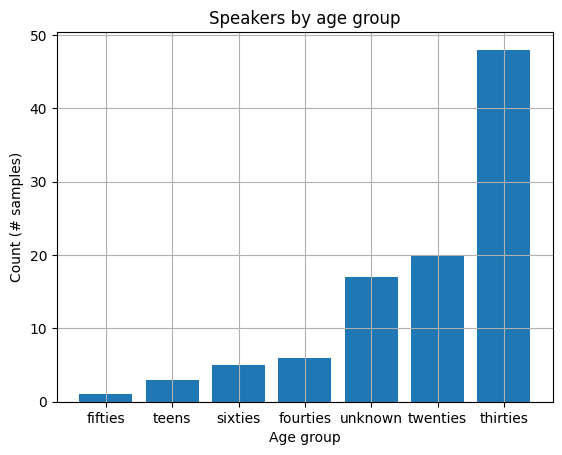

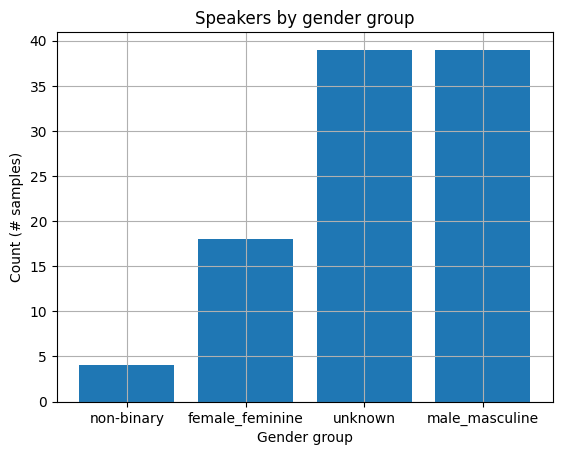

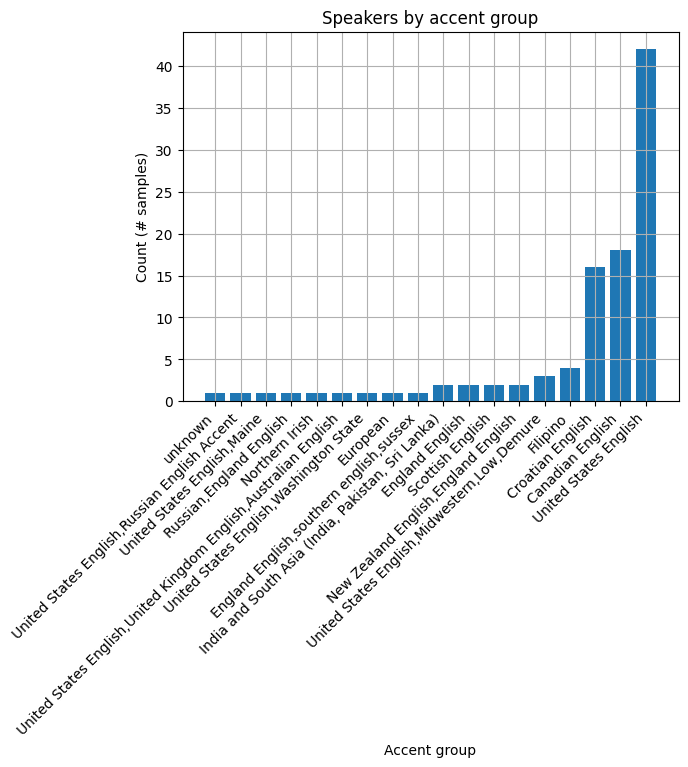

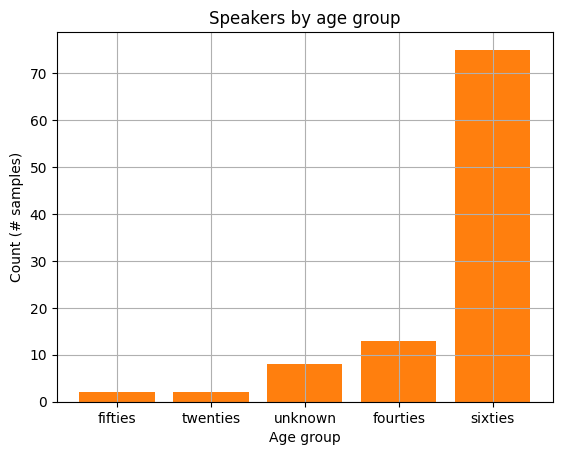

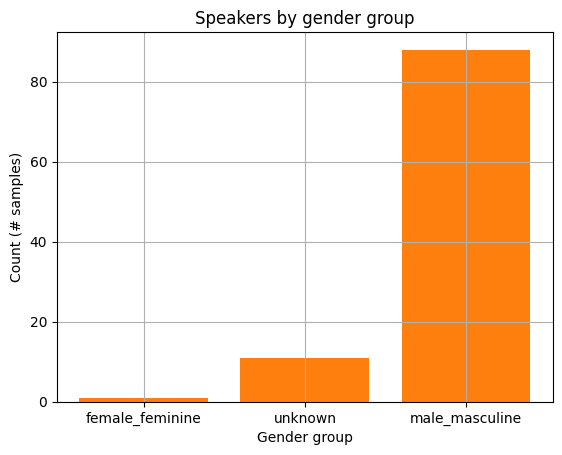

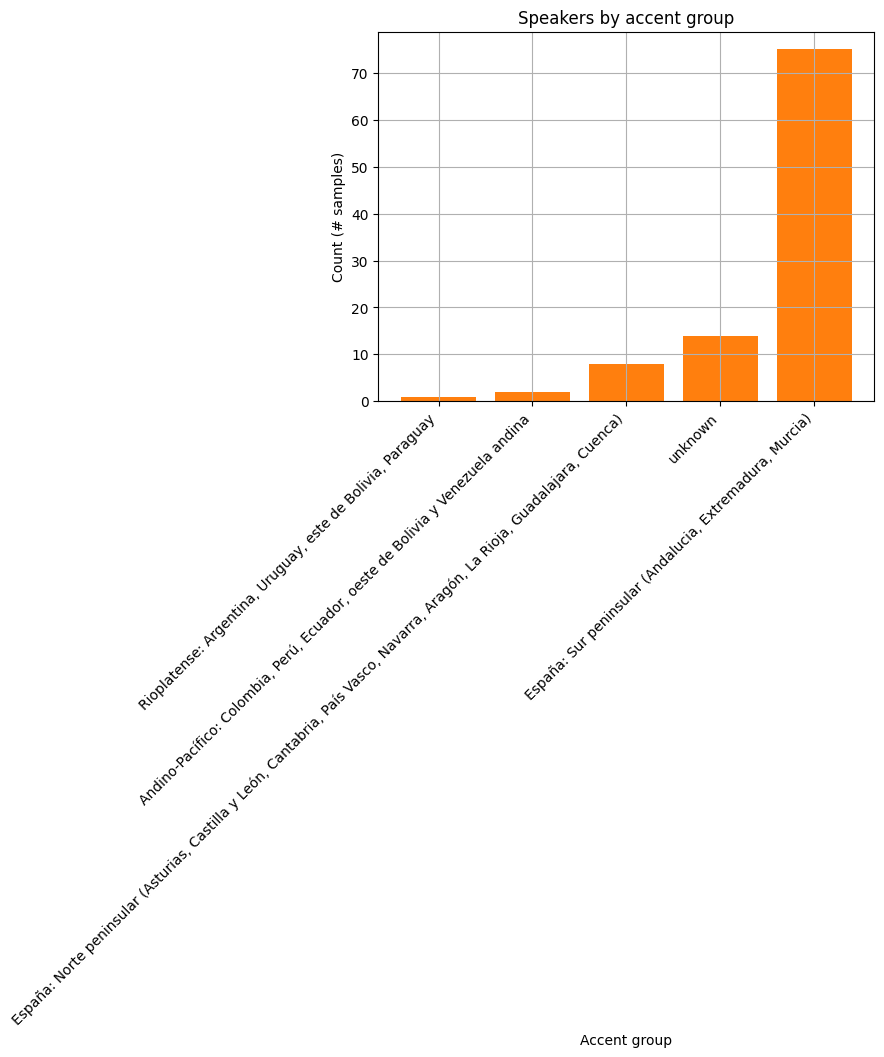

In [67]:
for ds, color in zip(('en', 'es'), plt.cm.tab10([0, 1])):

    df = pd.read_csv(
        os.path.join('speech_evals', 'tiny', f'{ds}_results_eval_1.tsv'),
        sep='\t'
    ).fillna('')

    for col, name in zip(('age', 'gender', 'accents'), ('age', 'gender', 'accent')):

        fig, ax = plt.subplots()

        labels, counts = np.unique(df[col], return_counts=True)

        empty_idx = np.where(labels == '')[0][0].item()
        labels[empty_idx] = 'unknown'

        sorted_idxs = np.argsort(counts)
        labels = labels[sorted_idxs]
        counts = counts[sorted_idxs]

        ax.bar(
            x=labels,
            height=counts,
            color=color
        )
        ax.set_title(f'Speakers by {name} group')
        ax.set_xlabel(f'{name.capitalize()} group')
        ax.set_ylabel('Count (# samples)')
        ax.grid()
        if name == 'accent':
            ax.set_xticklabels(labels, rotation=45, ha='right')
        plt.savefig(f'figs/{ds}_{name}.pdf', dpi=300, bbox_inches='tight')

In [68]:
en_df = pd.read_csv(
    os.path.join('speech_evals', 'tiny', 'en_results_eval_1.tsv'),
    sep='\t'
).fillna('')[['sentence_length', 'audio_length']]

es_df = pd.read_csv(
    os.path.join('speech_evals', 'tiny', 'es_results_eval_1.tsv'),
    sep='\t'
).fillna('')[['sentence_length', 'audio_length']]

wiki_df = pd.read_csv(
    os.path.join('speech_evals', 'tiny', 'wiki_results_eval_1.tsv'),
    sep='\t'
).fillna('')[['sentence_length', 'audio_length']]

In [69]:
print(en_df.describe().round(2).astype(str).to_latex())
print(es_df.describe().round(2).astype(str).to_latex())
print(wiki_df.describe().round(2).astype(str).to_latex())

\begin{tabular}{lll}
\toprule
 & sentence_length & audio_length \\
\midrule
count & 100.0 & 100.0 \\
mean & 71.56 & 6.25 \\
std & 14.3 & 1.47 \\
min & 50.0 & 3.17 \\
25% & 60.0 & 5.22 \\
50% & 69.0 & 6.05 \\
75% & 83.0 & 7.23 \\
max & 113.0 & 10.91 \\
\bottomrule
\end{tabular}

\begin{tabular}{lll}
\toprule
 & sentence_length & audio_length \\
\midrule
count & 100.0 & 100.0 \\
mean & 103.56 & 7.95 \\
std & 5.53 & 1.51 \\
min & 98.0 & 5.44 \\
25% & 99.0 & 7.0 \\
50% & 102.0 & 7.65 \\
75% & 106.25 & 8.55 \\
max & 129.0 & 13.18 \\
\bottomrule
\end{tabular}

\begin{tabular}{lll}
\toprule
 & sentence_length & audio_length \\
\midrule
count & 100.0 & 100.0 \\
mean & 26.51 & 3.04 \\
std & 11.3 & 0.78 \\
min & 5.0 & 1.66 \\
25% & 19.0 & 2.5 \\
50% & 25.0 & 2.89 \\
75% & 32.0 & 3.48 \\
max & 58.0 & 5.33 \\
\bottomrule
\end{tabular}



In [70]:
def total_rtf(model):
    model = model.replace(os.path.sep, '--')
    en_df = pd.read_csv(f'speech_evals/{model}/en_results_eval_1.tsv', sep='\t')
    es_df = pd.read_csv(f'speech_evals/{model}/es_results_eval_1.tsv', sep='\t')
    wiki_df = pd.read_csv(f'speech_evals/{model}/wiki_results_eval_1.tsv', sep='\t')

    total_latency = en_df['latency'].sum() + es_df['latency'].sum() + wiki_df['latency'].sum()
    total_duration = en_df['audio_length'].sum() + es_df['audio_length'].sum() + wiki_df['audio_length'].sum()

    return total_latency / total_duration

In [71]:
df['total_rtf'] = df['model_name'].apply(total_rtf)

KeyError: 'model_name'

In [ ]:
print(df[['model_name', 'total_rtf']].round(2).astype(str).to_latex(index=False))

\begin{tabular}{ll}
\toprule
model_name & total_rtf \\
\midrule
tiny & 0.12 \\
base & 0.12 \\
faster-small-quantized & 0.47 \\
faster-small & 0.77 \\
faster-medium-quantized & 2.56 \\
small & 0.22 \\
faster-large-v3-quantized & 2.5 \\
distil-whisper/distil-large-v2 & 0.48 \\
distil-whisper/distil-large-v3.5 & 0.45 \\
medium & 0.65 \\
turbo & 1.44 \\
faster-medium & 1.59 \\
large-v1 & 1.1 \\
large-v2 & 1.1 \\
large-v3 & 1.12 \\
faster-large-v3 & 2.62 \\
\bottomrule
\end{tabular}



In [ ]:
df

,model_name,load_time,cpu_mem_usage,gpu_mem_usage,size_on_disk,en_results,en_results_wer,en_results_rtf,es_results,es_results_wer,...,wiki_results,wiki_results_wer,wiki_results_rtf,agg_wer,agg_rtf,en_results_tradeoff,es_results_tradeoff,wiki_results_tradeoff,agg_tradeoff,total_rtf
14,tiny,1.064578,0.138524,-1.000000,0.138524,speech_evals/tiny/en_results_eval_1.tsv,0.186426,0.078306,speech_evals/tiny/es_results_eval_1.tsv,0.775925,...,speech_evals/tiny/wiki_results_eval_1.tsv,0.164589,0.076642,0.375646,0.105177,0.005505,0.044508,0.003167,0.013736,0.115962
0,base,1.100589,0.267572,-1.000000,0.267572,speech_evals/base/en_results_eval_1.tsv,0.115120,0.078983,speech_evals/base/es_results_eval_1.tsv,0.609862,...,speech_evals/base/wiki_results_eval_1.tsv,0.149626,0.140392,0.291536,0.120991,0.003429,0.031283,0.005274,0.012264,0.119600
7,faster-small-quantized,0.461849,0.471375,-1.000000,0.471375,speech_evals/faster-small-quantized/en_results...,0.078179,0.375225,speech_evals/faster-small-quantized/es_results...,0.350254,...,speech_evals/faster-small-quantized/wiki_resul...,0.074813,1.012801,0.167748,0.576137,0.011062,0.042587,0.019024,0.033602,0.471425
8,faster-small,0.420614,0.655838,-1.000000,0.655838,speech_evals/faster-small/en_results_eval_1.tsv,0.079038,0.795837,speech_evals/faster-small/es_results_eval_1.tsv,0.332850,...,speech_evals/faster-small/wiki_results_eval_1.tsv,0.077307,0.936931,0.163065,0.802952,0.023719,0.080385,0.018185,0.045522,0.765450
5,faster-medium-quantized,2.191214,0.814392,-1.000000,0.814392,speech_evals/faster-medium-quantized/en_result...,0.067010,1.789192,speech_evals/faster-medium-quantized/es_result...,0.242204,...,speech_evals/faster-medium-quantized/wiki_resu...,0.034913,3.494257,0.114709,2.694311,0.045210,0.242204,0.030629,0.107454,2.555418
13,small,2.509757,0.896241,-1.000000,0.896241,speech_evals/small/en_results_eval_1.tsv,0.089347,0.194822,speech_evals/small/es_results_eval_1.tsv,0.385787,...,speech_evals/small/wiki_results_eval_1.tsv,0.067332,0.369337,0.180822,0.245681,0.006564,0.023824,0.006244,0.015445,0.215433
3,faster-large-v3-quantized,5.457338,1.105804,-1.000000,1.105804,speech_evals/faster-large-v3-quantized/en_resu...,0.061856,2.651932,speech_evals/faster-large-v3-quantized/es_resu...,0.116751,...,speech_evals/faster-large-v3-quantized/wiki_re...,0.037406,3.982909,0.072004,2.817399,0.061856,0.075792,0.037406,0.070532,2.501363
1,distil-whisper/distil-large-v2,4.396537,2.817140,2.817140,2.817140,speech_evals/distil-whisper--distil-large-v2/e...,0.074742,0.436656,speech_evals/distil-whisper--distil-large-v2/e...,0.956490,...,speech_evals/distil-whisper--distil-large-v2/w...,0.064838,0.768162,0.365357,0.536094,0.012307,0.137850,0.012505,0.068098,0.479720
2,distil-whisper/distil-large-v3.5,6.153826,2.817831,2.818136,2.817831,speech_evals/distil-whisper--distil-large-v3.5...,0.062715,0.415446,speech_evals/distil-whisper--distil-large-v3.5...,1.010152,...,speech_evals/distil-whisper--distil-large-v3.5...,0.044888,0.755670,0.372585,0.513974,0.009825,0.133800,0.008516,0.066580,0.454766
12,medium,10.538503,2.839870,-1.000000,2.839870,speech_evals/medium/en_results_eval_1.tsv,0.070447,0.547546,speech_evals/medium/es_results_eval_1.tsv,0.275562,...,speech_evals/medium/wiki_results_eval_1.tsv,0.027431,1.097711,0.124480,0.732032,0.014545,0.054221,0.007560,0.031681,0.645942


In [ ]:
print(df[['model_name', 'load_time', 'cpu_mem_usage']].round(2).astype(str).to_latex(index=False))

\begin{tabular}{lll}
\toprule
model_name & load_time & cpu_mem_usage \\
\midrule
tiny & 1.06 & 0.14 \\
base & 1.1 & 0.27 \\
faster-small-quantized & 0.46 & 0.47 \\
faster-small & 0.42 & 0.66 \\
faster-medium-quantized & 2.19 & 0.81 \\
small & 2.51 & 0.9 \\
faster-large-v3-quantized & 5.46 & 1.11 \\
distil-whisper/distil-large-v2 & 4.4 & 2.82 \\
distil-whisper/distil-large-v3.5 & 6.15 & 2.82 \\
medium & 10.54 & 2.84 \\
turbo & 58.98 & 3.01 \\
faster-medium & 1.84 & 3.66 \\
large-v1 & 141.47 & 5.74 \\
large-v2 & 131.33 & 5.74 \\
large-v3 & 119.94 & 5.74 \\
faster-large-v3 & 7.56 & 5.8 \\
\bottomrule
\end{tabular}



In [ ]:
print(df.where(df['model_name'].str.contains('small')).dropna()[
    ['model_name', 'en_results_wer', 'es_results_wer', 'wiki_results_wer', 'agg_wer', 'en_results_rtf', 'es_results_rtf', 'wiki_results_rtf', 'agg_rtf', 'total_rtf', 'load_time', 'cpu_mem_usage']
].round(2).astype(str).transpose().to_latex())

\begin{tabular}{llll}
\toprule
 & 7 & 8 & 13 \\
\midrule
model_name & faster-small-quantized & faster-small & small \\
en_results_wer & 0.08 & 0.08 & 0.09 \\
es_results_wer & 0.35 & 0.33 & 0.39 \\
wiki_results_wer & 0.07 & 0.08 & 0.07 \\
agg_wer & 0.17 & 0.16 & 0.18 \\
en_results_rtf & 0.38 & 0.8 & 0.19 \\
es_results_rtf & 0.34 & 0.68 & 0.17 \\
wiki_results_rtf & 1.01 & 0.94 & 0.37 \\
agg_rtf & 0.58 & 0.8 & 0.25 \\
total_rtf & 0.47 & 0.77 & 0.22 \\
load_time & 0.46 & 0.42 & 2.51 \\
cpu_mem_usage & 0.47 & 0.66 & 0.9 \\
\bottomrule
\end{tabular}



In [ ]:
print(df.where(df['model_name'].str.contains('medium')).dropna()[
    ['model_name', 'en_results_wer', 'es_results_wer', 'wiki_results_wer', 'agg_wer', 'en_results_rtf', 'es_results_rtf', 'wiki_results_rtf', 'agg_rtf', 'total_rtf', 'load_time', 'cpu_mem_usage']
].round(2).astype(str).transpose()[[5, 6, 12]].to_latex())

\begin{tabular}{llll}
\toprule
 & 5 & 6 & 12 \\
\midrule
model_name & faster-medium-quantized & faster-medium & medium \\
en_results_wer & 0.07 & 0.07 & 0.07 \\
es_results_wer & 0.24 & 0.22 & 0.28 \\
wiki_results_wer & 0.03 & 0.04 & 0.03 \\
agg_wer & 0.11 & 0.11 & 0.12 \\
en_results_rtf & 1.79 & 1.44 & 0.55 \\
es_results_rtf & 2.8 & 1.42 & 0.55 \\
wiki_results_rtf & 3.49 & 2.33 & 1.1 \\
agg_rtf & 2.69 & 1.73 & 0.73 \\
total_rtf & 2.56 & 1.59 & 0.65 \\
load_time & 2.19 & 1.84 & 10.54 \\
cpu_mem_usage & 0.81 & 3.66 & 2.84 \\
\bottomrule
\end{tabular}



In [ ]:
print(df.where(df['model_name'].str.contains('large-v3')).dropna()[
    ['model_name', 'en_results_wer', 'es_results_wer', 'wiki_results_wer', 'agg_wer', 'en_results_rtf', 'es_results_rtf', 'wiki_results_rtf', 'agg_rtf', 'total_rtf', 'load_time', 'cpu_mem_usage']
].round(2).astype(str).transpose()[[3, 4, 11, 2]].to_latex())

\begin{tabular}{lllll}
\toprule
 & 3 & 4 & 11 & 2 \\
\midrule
model_name & faster-large-v3-quantized & faster-large-v3 & large-v3 & distil-whisper/distil-large-v3.5 \\
en_results_wer & 0.06 & 0.06 & 0.07 & 0.06 \\
es_results_wer & 0.12 & 0.12 & 0.12 & 1.01 \\
wiki_results_wer & 0.04 & 0.04 & 0.03 & 0.04 \\
agg_wer & 0.07 & 0.07 & 0.07 & 0.37 \\
en_results_rtf & 2.65 & 2.5 & 0.97 & 0.42 \\
es_results_rtf & 1.82 & 2.23 & 0.94 & 0.37 \\
wiki_results_rtf & 3.98 & 3.9 & 1.91 & 0.76 \\
agg_rtf & 2.82 & 2.88 & 1.27 & 0.51 \\
total_rtf & 2.5 & 2.62 & 1.12 & 0.45 \\
load_time & 5.46 & 7.56 & 119.94 & 6.15 \\
cpu_mem_usage & 1.11 & 5.8 & 5.74 & 2.82 \\
\bottomrule
\end{tabular}



In [ ]:
print(df.where(df['model_name'].str.contains('large-v2')).dropna()[
    ['model_name', 'en_results_wer', 'es_results_wer', 'wiki_results_wer', 'agg_wer', 'en_results_rtf', 'es_results_rtf', 'wiki_results_rtf', 'agg_rtf', 'total_rtf', 'load_time', 'cpu_mem_usage']
].round(2).astype(str).transpose()[[10, 1]].to_latex())

\begin{tabular}{lll}
\toprule
 & 10 & 1 \\
\midrule
model_name & large-v2 & distil-whisper/distil-large-v2 \\
en_results_wer & 0.06 & 0.07 \\
es_results_wer & 0.17 & 0.96 \\
wiki_results_wer & 0.03 & 0.06 \\
agg_wer & 0.09 & 0.37 \\
en_results_rtf & 0.98 & 0.44 \\
es_results_rtf & 0.9 & 0.4 \\
wiki_results_rtf & 1.86 & 0.77 \\
agg_rtf & 1.25 & 0.54 \\
total_rtf & 1.1 & 0.48 \\
load_time & 131.33 & 4.4 \\
cpu_mem_usage & 5.74 & 2.82 \\
\bottomrule
\end{tabular}

